<a href="https://colab.research.google.com/github/JayNguyen-123/TimeSeries1/blob/main/TimeSeries1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

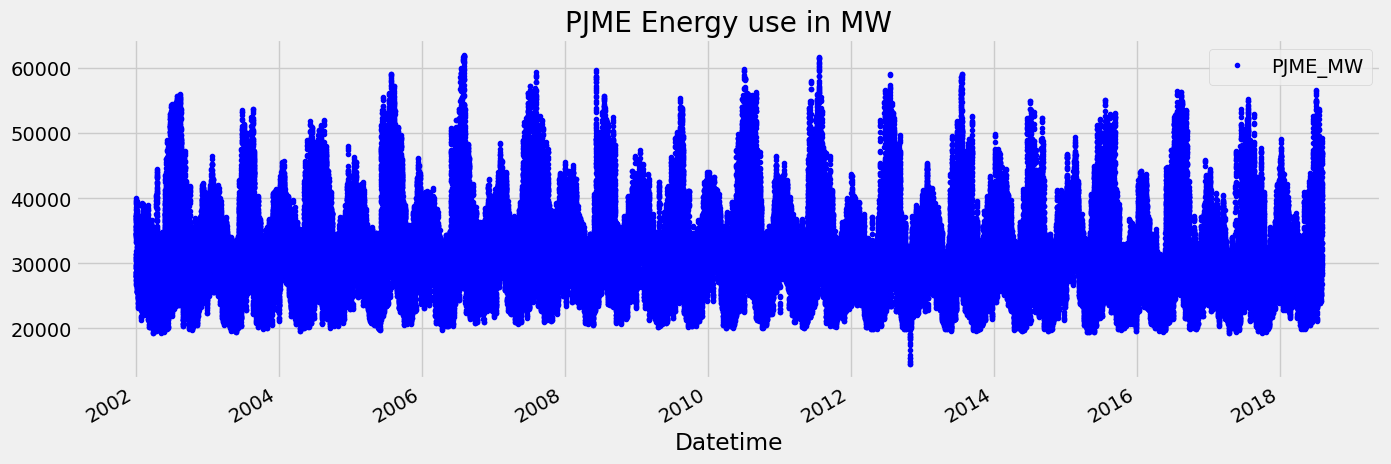

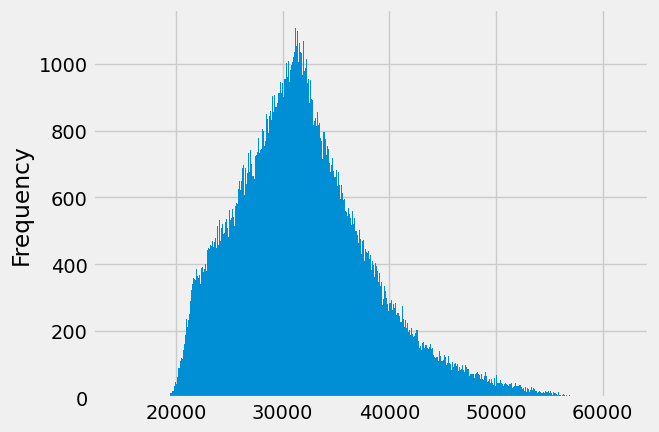

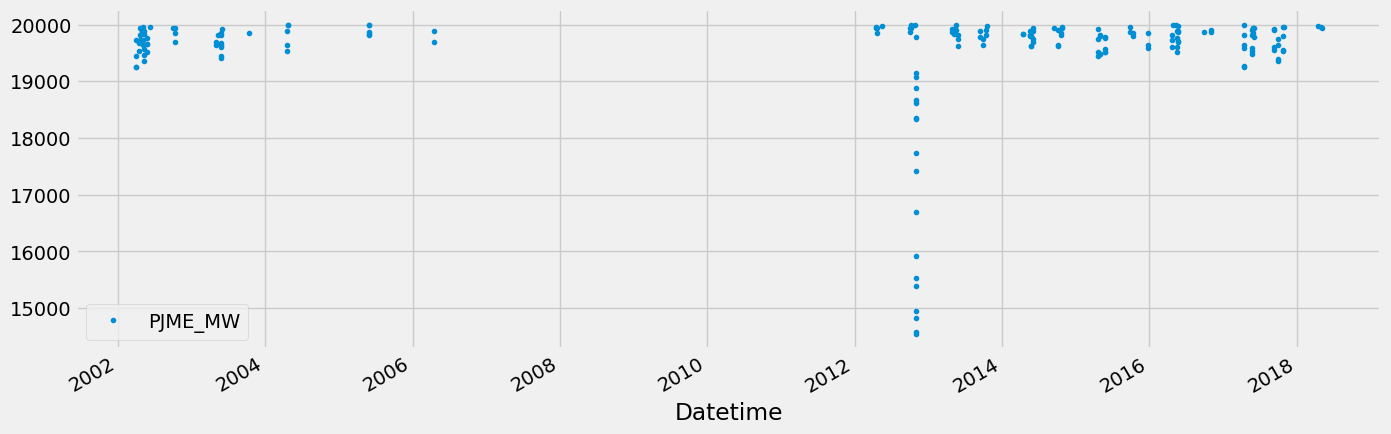

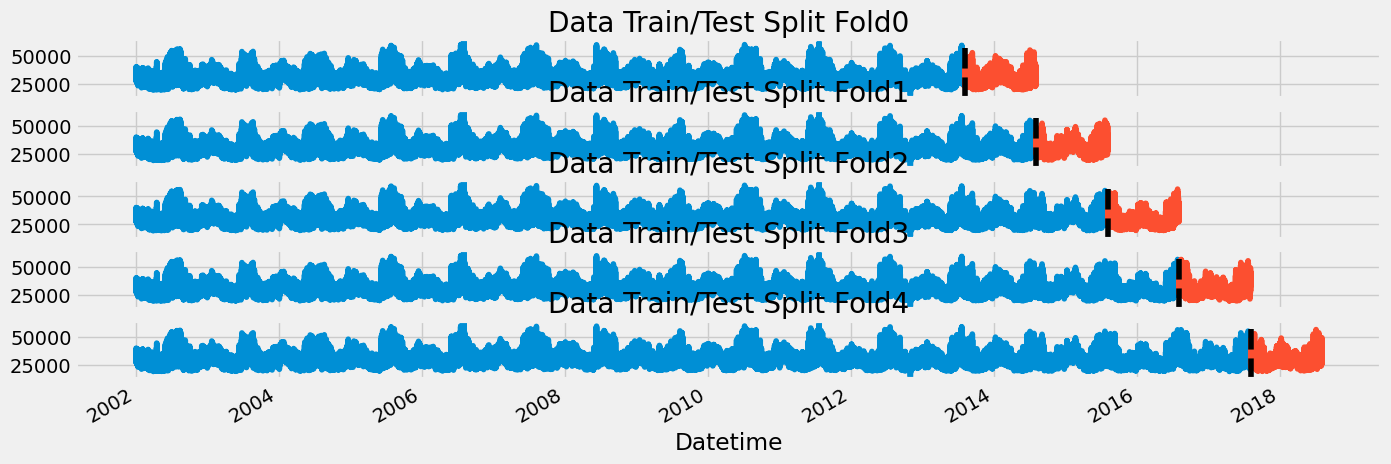

[0]	validation_0-rmse:32729.54393	validation_1-rmse:31956.52412


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:47:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12401.79639	validation_1-rmse:12037.36160
[200]	validation_0-rmse:5386.00417	validation_1-rmse:5545.70967
[300]	validation_0-rmse:3369.18383	validation_1-rmse:4032.48897
[400]	validation_0-rmse:2908.05647	validation_1-rmse:3785.32941
[500]	validation_0-rmse:2724.17495	validation_1-rmse:3739.24355
[530]	validation_0-rmse:2684.86480	validation_1-rmse:3745.10428
[0]	validation_0-rmse:32669.41831	validation_1-rmse:32140.91717


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:47:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12389.63045	validation_1-rmse:12396.08063
[200]	validation_0-rmse:5409.33310	validation_1-rmse:5769.19754
[300]	validation_0-rmse:3413.14587	validation_1-rmse:3877.51825
[400]	validation_0-rmse:2961.32158	validation_1-rmse:3475.79912
[500]	validation_0-rmse:2786.25154	validation_1-rmse:3411.99015
[600]	validation_0-rmse:2683.56110	validation_1-rmse:3392.93134
[700]	validation_0-rmse:2605.58353	validation_1-rmse:3393.16563
[705]	validation_0-rmse:2603.35904	validation_1-rmse:3393.63867
[0]	validation_0-rmse:32628.61298	validation_1-rmse:31076.83494


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:47:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12376.79497	validation_1-rmse:11230.47951
[200]	validation_0-rmse:5414.54812	validation_1-rmse:4787.97793
[300]	validation_0-rmse:3433.04783	validation_1-rmse:3560.75514
[375]	validation_0-rmse:3049.96368	validation_1-rmse:3562.99365
[0]	validation_0-rmse:32525.90398	validation_1-rmse:31475.79427


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:48:04] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12340.27194	validation_1-rmse:12140.24660
[200]	validation_0-rmse:5411.17469	validation_1-rmse:5863.39534
[300]	validation_0-rmse:3442.23270	validation_1-rmse:4365.91268
[400]	validation_0-rmse:3002.04433	validation_1-rmse:4059.32694
[500]	validation_0-rmse:2829.20484	validation_1-rmse:3912.04648
[600]	validation_0-rmse:2729.58676	validation_1-rmse:3884.70207
[700]	validation_0-rmse:2649.64302	validation_1-rmse:3873.14469
[745]	validation_0-rmse:2618.74814	validation_1-rmse:3874.93494
[0]	validation_0-rmse:32459.76913	validation_1-rmse:31467.09807


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:48:22] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12328.85140	validation_1-rmse:12132.53263
[200]	validation_0-rmse:5434.80812	validation_1-rmse:5818.75841
[300]	validation_0-rmse:3486.99080	validation_1-rmse:4272.36026
[400]	validation_0-rmse:3052.50558	validation_1-rmse:3999.82305
[500]	validation_0-rmse:2897.29305	validation_1-rmse:3978.84133
[529]	validation_0-rmse:2861.12183	validation_1-rmse:3993.68687


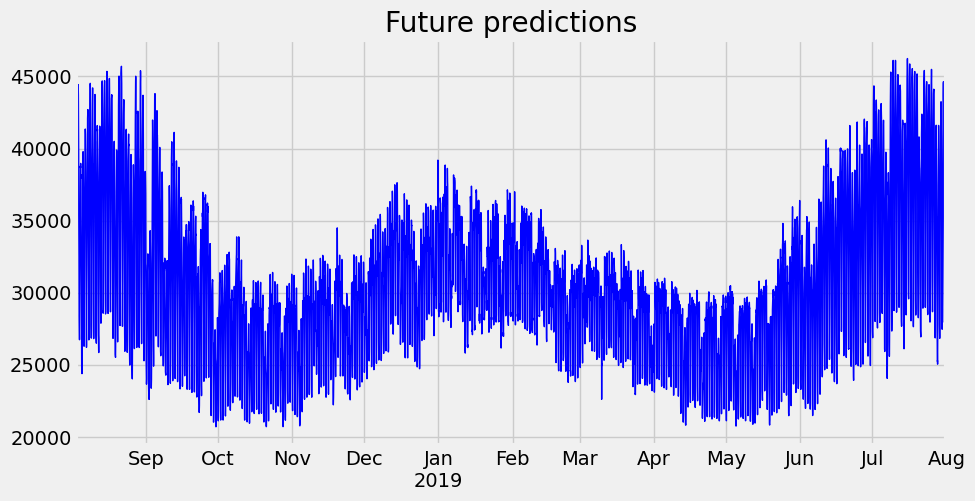

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')

df = pd.read_csv('/content/PJME_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df.head()

df.plot(style='.', figsize=(15,5), color='b', title='PJME Energy use in MW')
plt.show()

# Outline analysis and removal
df['PJME_MW'].plot(kind='hist', bins=500)

df.query('PJME_MW < 20000').plot(figsize=(15,5), style='.')

df.query('PJME_MW < 19_000').copy()

# Time series cross validation
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df.sort_index()


fig, ax = plt.subplots(5, 1, figsize=(15,5), sharex=True)
fold=0

for train_idx, val_idx in tss.split(df):
  train = df.iloc[train_idx]
  test = df.iloc[val_idx]
  train['PJME_MW'].plot(ax=ax[fold],
                        label='Training Set', title=f'Data Train/Test Split Fold{fold}')
  test['PJME_MW'].plot(ax=ax[fold], label='Test Set')
  ax[fold].axvline(test.index.min(), color='black', ls='--')
  fold += 1

plt.show()

# Forecasting horizon
# feature creation
def create_features(df):
  df = df.copy()
  df['hour'] = df.index.hour
  df['dayofweek'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['dayofyear'] = df.index.dayofyear
  df['dayofmonth'] = df.index.day
  df['weekofyear'] = df.index.isocalendar().week
  return df

df = create_features(df)

def add_lags(df):
  target_map = df['PJME_MW'].to_dict()
  df['lag1'] = (df.index -pd.Timedelta('364 days')).map(target_map)
  df['lag2'] = (df.index -pd.Timedelta('728 days')).map(target_map)
  df['lag3'] = (df.index -pd.Timedelta('1092 days')).map(target_map)
  return df

df = add_lags(df)
df.tail()

# Train using cross validation
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df.sort_index()

fold = 0
pred=[]
scores=[]
for train_idx , val_idx in tss.split(df):
  train = df.iloc[train_idx]
  test = df.iloc[val_idx]

  train = create_features(train)
  test = create_features(test)

  FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'lag1', 'lag2', 'lag3']
  TARGET = 'PJME_MW'

  X_train = train[FEATURES]
  y_train = train[TARGET]

  X_test = test[FEATURES]
  y_test = test[TARGET]

  reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', n_estimators=1000, early_stopping_rounds=50, objective='reg:linear', learning_rate=0.01)
  reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)

  y_pred = reg.predict(X_test)
  pred.append(y_pred)
  score = np.sqrt(mean_squared_error(y_test, y_pred))
  scores.append(score)

# Create future dataframe
future = pd.date_range('2018-08-03', '2019-08-01', freq='1h')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])

df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)

feature_w_future = df_and_future.query('isFuture').copy()

feature_w_future['pred'] = reg.predict(feature_w_future[FEATURES])
feature_w_future['pred'].plot(figsize=(10,5), color='b', ms=1, lw=1, title='Future predictions')
plt.show()












